In [2]:
mport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline
import plotly.express as px

In [3]:
df=pd.read_csv('Dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.thal.value_counts()
#3 = normal; 6 = fixed defect; 7 = reversable defect

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [5]:
# Replace 0 with NaN
df.loc[df['thal']==0, 'thal'] = np.NaN

In [6]:
df.thal.unique()

array([ 1.,  2.,  3., nan])

In [7]:
df.ca.value_counts()
# number of major vessels (0-3) colored by flourosopy

# Replace 4 with NaN
df.loc[df['ca']==4, 'ca'] = np.NaN
df['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [8]:
# Replace NaN with median values
df=df.fillna(df.median())

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


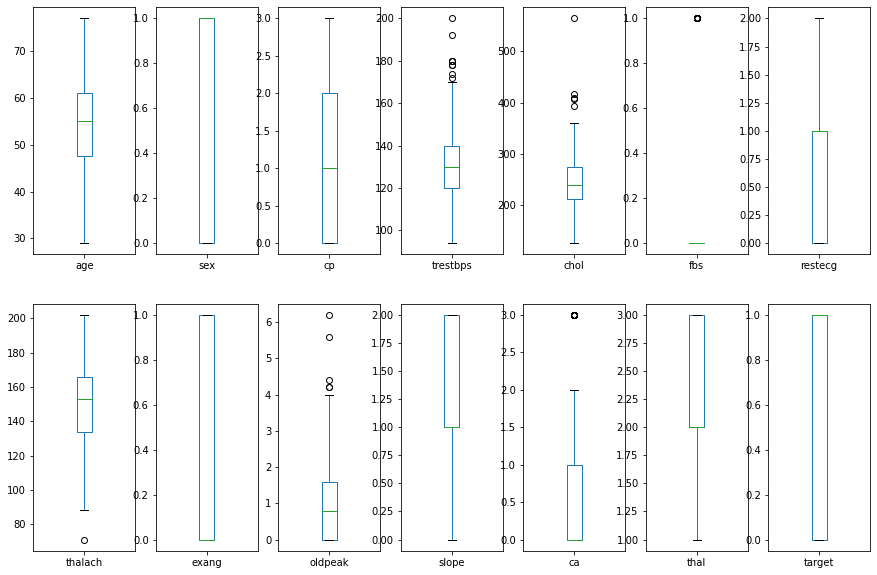

In [9]:

# Check for outliers
df.plot(kind='box',subplots=True, sharex=False, 
        sharey=False,layout=(2, 7), figsize=(15,10));

In [10]:
df.chol.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [11]:
chol_median=240
df.loc[df['chol']==564, 'chol'] = 240

In [12]:
df.trestbps.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [16]:
y=df.target.value_counts()
x=['Disease','No Disease']

fig=go.Figure(
    data=[go.Bar(x=x,y=y,text=y, textposition='auto',)],
                    layout=go.Layout(title=go.layout.Title(text='Target Variable (Heart Disease) Distribution')))
fig.update_xaxes(title_text='Target')
fig.update_yaxes(title_text='Number of Individuals')
fig.show()

In [15]:
fig = px.histogram(df, x='age',color_discrete_sequence=['coral'])
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Age')

fig.show()


From this graph, we can see most patients are between 50 - 60 years old.

In [17]:
female=df.loc[df['sex']==0]
female_values=female.target.value_counts()
male=df.loc[df['sex']==1]
male_values=male.target.value_counts()
target=['No Disease','Disease']

fig = go.Figure(data=[
    go.Bar(name='female', x=female_values.index, y=female_values, text=female_values, textposition='auto'),
    go.Bar(name='male', x=male_values.index, y=male_values, text=male_values, textposition='auto'),
])
fig.update_xaxes(title_text='Target')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Sex According to Target Variable')
fig.update_layout(barmode='group')
fig.show()


There are more male than female patients in the disease group (1).

In [18]:
cp=['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic']
y1=df.loc[df['target']==0].cp.value_counts()
y2=df.loc[df['target']==1].cp.value_counts()

fig = go.Figure(data=[
    go.Bar(name='Disease', x=cp, y=y2),
    go.Bar(name='No Disease', x=cp, y=y1)
])
fig.update_layout(barmode='group')
fig.update_xaxes(title_text='Chest Pain Type')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Target Variable According to Chest Pain Type')

fig.show()

Chest pain or angina is a type of discomfort caused when heart muscles don’t receive enough oxygen rich blood, which triggered discomfort in arms, shoulders, neck, etc. From the graph, higher numbers of heart disease patients without chest pain and almost balance amount between typical and atypical anginal pain.

In [19]:
dis=df.loc[df['target']==1]
dis_values=dis.fbs.value_counts()
nodis=df.loc[df['target']==0]
nodis_values=nodis.fbs.value_counts()
target=['No Disease','Disease']
d=['False','True']

fig = go.Figure(data=[
    go.Bar(name='Disease', x=d, y=dis_values, text=dis_values, textposition='auto'),
    go.Bar(name='No Disease', x=d, y=nodis_values, text=nodis_values, textposition='auto'),
])
fig.update_layout(barmode='group')
fig.update_xaxes(title_text='Fasting Blood Sugar (fbs)')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Target Variable According to Fasting Blood Sugar')

fig.show()


Fasting blood sugar (fbs) is a diabetes indicator with fbs >120 mg/d is considered diabetic (True). Here, we see that the number for class true, is lower compared to class false. However, if we look closely, there are higher number of heart disease patient without diabetes. This provide an indication that fbs might not be a strong feature differentiating between heart disease an non-disease patient.

In [20]:
ca=['0','1','2','3']
y1=df.loc[df['target']==0].ca.value_counts()
y2=df.loc[df['target']==1].ca.value_counts()

fig = go.Figure(data=[
    go.Bar(name='Disease', x=ca, y=y2),
    go.Bar(name='No Disease', x=ca, y=y1)
])
fig.update_layout(barmode='group')
fig.update_xaxes(title_text='Number of Major Blood Vessels')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Target Variable According to Number of Major Blood Vessels')

fig.show()

# Checking for collinearity

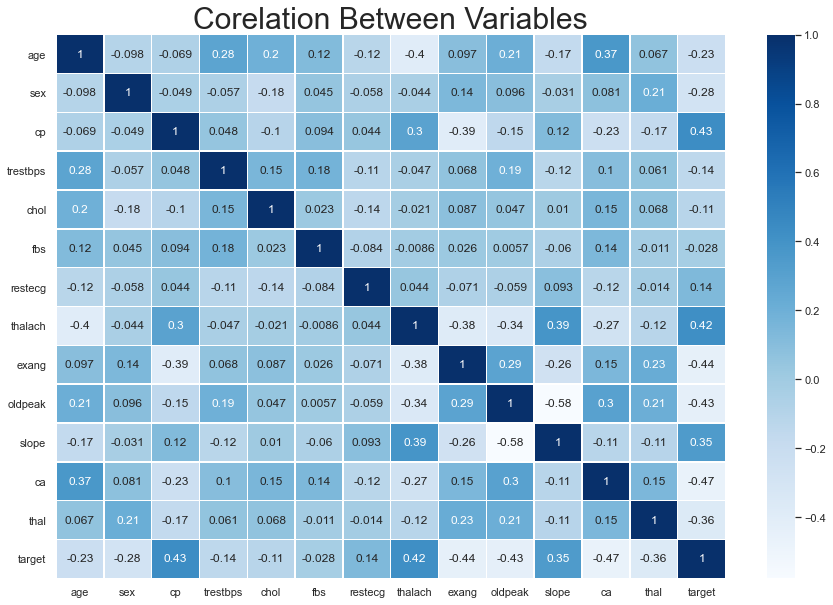

In [21]:

sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

# Exporting The cleaned dataset

In [22]:
df.to_csv('cleaned_heart_dataset.csv')